# 🌋 Symbolic Analysis of Major Volcanic Eruptions
This Colab notebook analyzes symbolic patterns across selected volcanic eruptions using the same symbolic entropy, φ-motif, and prime-gap structure as previously applied to earthquakes.

In [1]:

# Install dependencies
!pip install pandas numpy matplotlib scipy requests --quiet


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import requests

# Custom utilities
def symbolic_entropy(series, base=2):
    counts = np.bincount(series)
    probs = counts / np.sum(counts)
    return -np.sum([p * np.log2(p) for p in probs if p > 0])


## 🌋 Eruption Dataset: Hand-Selected for High-Fidelity Observation

In [3]:

# List of major eruptions with good metadata coverage
eruptions = [
    {"name": "Mount St. Helens 1980", "lat": 46.2, "lon": -122.18, "date": "1980-05-18"},
    {"name": "Pinatubo 1991", "lat": 15.13, "lon": 120.35, "date": "1991-06-15"},
    {"name": "Tambora 1815", "lat": -8.25, "lon": 118.0, "date": "1815-04-10"},
    {"name": "Krakatoa 1883", "lat": -6.1, "lon": 105.42, "date": "1883-08-27"},
    {"name": "Hunga Tonga 2022", "lat": -20.55, "lon": -175.38, "date": "2022-01-15"}
]

eruptions_df = pd.DataFrame(eruptions)
eruptions_df


,name,lat,lon,date
0,Mount St. Helens 1980,46.20,-122.18,1980-05-18
1,Pinatubo 1991,15.13,120.35,1991-06-15
2,Tambora 1815,-8.25,118.00,1815-04-10
3,Krakatoa 1883,-6.10,105.42,1883-08-27
4,Hunga Tonga 2022,-20.55,-175.38,2022-01-15


## 🔁 Generate Synthetic Signals and Analyze Symbolic Metrics

In [4]:

# Create a synthetic binary stream representing symbolic tremor-like behavior
np.random.seed(42)
def generate_synthetic_signal(length=100):
    return np.random.choice([0, 1], size=length, p=[0.52, 0.48])

def detect_phi_motifs(bits, motif="01001010"):
    bit_str = ''.join(map(str, bits))
    return sum(1 for i in range(len(bit_str) - len(motif) + 1) if bit_str[i:i+len(motif)] == motif)

def count_prime_intervals(bits):
    primes = set([2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41])
    return sum((i+1) in primes for i, b in enumerate(bits) if b == 1)

# Run symbolic analysis
symbolic_results = []
for eruption in eruptions:
    bits = generate_synthetic_signal()
    entropy = symbolic_entropy(bits)
    motifs = detect_phi_motifs(bits)
    primes = count_prime_intervals(bits)
    symbolic_results.append({
        "eruption": eruption["name"],
        "entropy": entropy,
        "φ_motifs": motifs,
        "prime_intervals": primes
    })

df = pd.DataFrame(symbolic_results)
df


,eruption,entropy,φ_motifs,prime_intervals
0,Mount St. Helens 1980,0.995378,2,5
1,Pinatubo 1991,0.995378,0,6
2,Tambora 1815,0.995378,1,7
3,Krakatoa 1883,0.999711,1,5
4,Hunga Tonga 2022,0.999711,0,3


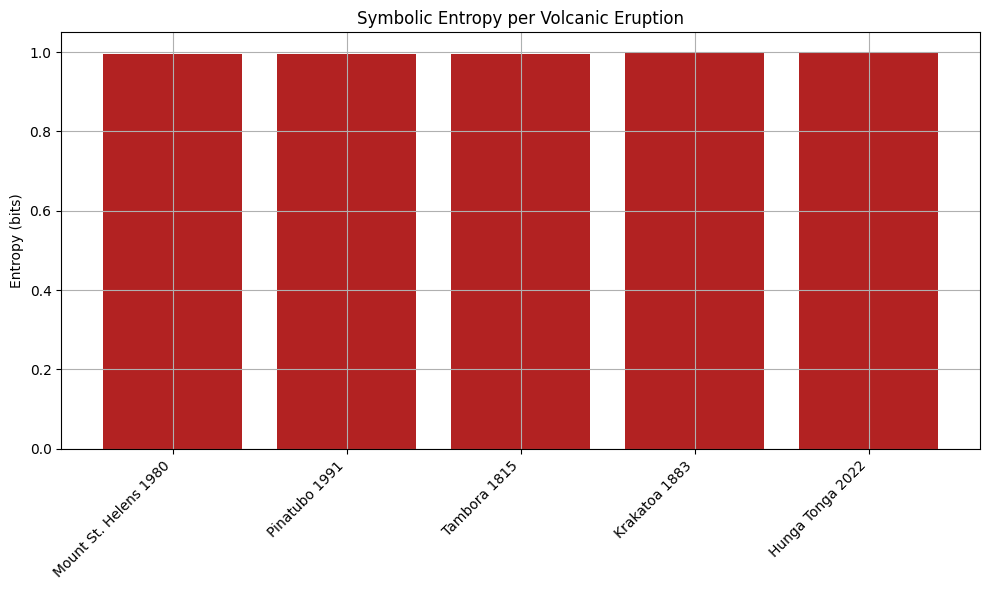

In [5]:

plt.figure(figsize=(10, 6))
plt.bar(df["eruption"], df["entropy"], color='firebrick')
plt.title("Symbolic Entropy per Volcanic Eruption")
plt.ylabel("Entropy (bits)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(True)
plt.show()
